Prophet package time series example (Facebook)
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
cwd = os.getcwd()
cwd

'/Users/stephenbrock/Documents/github/covid_case_comp/COVID-19 Case Comp/Jupyter Notebooks'

In [3]:
on_new = pd.read_csv("../Datasets/on_covid19.csv")
on_events = pd.read_csv("../Datasets/on_events.csv")
on_mobil = pd.read_csv("../Datasets/Mobility Data/ontario.csv")

In [4]:
on_new.head()

,category,New cases
0,2020-01-30T00:00:00,1
1,2020-01-31T00:00:00,0
2,2020-02-03T00:00:00,1
3,2020-02-04T00:00:00,0
4,2020-02-05T00:00:00,0


In [5]:
on_new.columns = ["date", "new"]

In [6]:
type(on_new["date"][1])

str

In [7]:
max(on_new.date)

'2020-10-04T00:00:00'

In [8]:
on_new = on_new.assign(date = lambda x: x['date'].map(lambda d: d[:10]))
#on_new['date'] = [d[:10] for d in on_new.date.values]

In [9]:
on_new.head()

,date,new
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-03,1
3,2020-02-04,0
4,2020-02-05,0


In [10]:
first_date = min(on_new.date.values)
last_date = max(on_new.date.values)
in_btw_dates = pd.date_range(start=first_date, end=last_date).values

In [11]:
in_btw_dates = [str(d)[:10] for d in in_btw_dates]

In [12]:
len(in_btw_dates)

249

In [13]:
on_new.shape

(239, 2)

In [14]:
dates = pd.DataFrame({'date':in_btw_dates})
on_new = on_new.merge(right=dates, how='right', on='date')

In [15]:
on_new.shape

(249, 2)

In [16]:
pd.isnull(on_new).sum()

date     0
new     10
dtype: int64

In [17]:
on_new = on_new.fillna(value=0)

In [18]:
pd.isnull(on_new).sum()

date    0
new     0
dtype: int64

In [19]:
on_mobil.head()

,province,region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Ontario,Algoma District,2020-02-15,0.0,0.0,23.0,8.0,-2.0,0.0
1,Ontario,Algoma District,2020-02-16,5.0,-1.0,NaN,-3.0,-5.0,0.0
2,Ontario,Algoma District,2020-02-17,-51.0,-66.0,NaN,-28.0,-66.0,12.0
3,Ontario,Algoma District,2020-02-18,-10.0,3.0,-16.0,-4.0,-4.0,3.0
4,Ontario,Algoma District,2020-02-19,3.0,-1.0,-6.0,-1.0,0.0,1.0


In [20]:
# get unique regions
np.unique(on_mobil.region.values, return_counts=True)

(array(['Algoma District', 'Brant County', 'Brantford', 'Bruce County',
        'Chatham-Kent Division', 'Cochrane District', 'Dufferin County',
        'Elgin County', 'Essex County', 'Frontenac County',
        'Greater Sudbury Division', 'Grey County', 'Haldimand County',
        'Haliburton County', 'Hamilton Division', 'Hastings County',
        'Huron County', 'Kawartha Lakes Division', 'Kenora District',
        'Lambton County', 'Lanark County',
        'Leeds and Grenville United Counties',
        'Lennox and Addington County', 'Manitoulin District',
        'Middlesex County', 'Muskoka District Municipality',
        'Nipissing District', 'Norfolk County', 'Northumberland County',
        'Ottawa Division', 'Oxford County', 'Parry Sound District',
        'Perth County', 'Peterborough County',
        'Prescott and Russell United Counties', 'Prince Edward County',
        'Rainy River District', 'Regional Municipality of Durham',
        'Regional Municipality of Halton',
  

In [21]:
len(np.unique(on_mobil.date.values))

235

In [22]:
on_mobil_mean = on_mobil.groupby(['date', 'province']).agg(
    mean_retail_change = pd.NamedAgg(column='retail_and_recreation_percent_change_from_baseline', aggfunc=np.mean),
    mean_grocery_change = pd.NamedAgg(column='grocery_and_pharmacy_percent_change_from_baseline', aggfunc=np.mean),
    mean_parks_change = pd.NamedAgg(column='parks_percent_change_from_baseline', aggfunc=np.mean),
    mean_transit_change = pd.NamedAgg(column='transit_stations_percent_change_from_baseline', aggfunc=np.mean),
    mean_workplace_change = pd.NamedAgg(column='workplaces_percent_change_from_baseline', aggfunc=np.mean),
    mean_residential_change = pd.NamedAgg(column='residential_percent_change_from_baseline', aggfunc=np.mean)
)

In [23]:
on_mobil_mean = on_mobil_mean.reset_index()

In [24]:
print(on_mobil_mean.date.min())
print(on_mobil_mean.date.max())

2020-02-15
2020-10-06


In [25]:
diff = datetime.date(datetime.strptime(on_mobil_mean.date.max(), "%Y-%m-%d")) - \
datetime.date(datetime.strptime(on_mobil_mean.date.min(), "%Y-%m-%d"))
diff.days

234

In [26]:
datetime.date(datetime.strptime(on_mobil_mean.date.min(), "%Y-%m-%d")) + timedelta(days=234)

datetime.date(2020, 10, 6)

In [27]:
# left join new cases onto mobil_mean
data = on_mobil_mean.merge(right=on_new, how='left', on='date')

In [28]:
data.head(20)

,date,province,mean_retail_change,mean_grocery_change,mean_parks_change,mean_transit_change,mean_workplace_change,mean_residential_change,new
0,2020-02-15,Ontario,6.466667,4.674419,24.333333,23.724138,1.767442,-1.000000,0.0
1,2020-02-16,Ontario,15.555556,15.452381,46.368421,6.678571,-1.595238,-2.291667,0.0
2,2020-02-17,Ontario,-25.545455,-43.250000,67.333333,-4.827586,-67.725490,14.454545,0.0
3,2020-02-18,Ontario,-2.822222,11.777778,-8.600000,0.310345,-1.125000,1.266667,0.0
4,2020-02-19,Ontario,-0.466667,4.111111,-4.538462,0.758621,1.375000,0.533333,0.0
5,2020-02-20,Ontario,5.311111,6.822222,0.652174,1.034483,2.395833,-0.288889,0.0
6,2020-02-21,Ontario,0.913043,-2.377778,3.629630,1.344828,-6.187500,1.466667,0.0
7,2020-02-22,Ontario,10.977778,7.000000,45.826087,18.620690,7.255814,-2.035714,0.0
8,2020-02-23,Ontario,12.933333,8.095238,50.100000,14.785714,4.804878,-1.541667,0.0
9,2020-02-24,Ontario,2.000000,3.311111,14.200000,2.724138,2.729167,-0.022222,1.0


In [29]:
# create 3 day and 5 day moving averages
# shift the moving average down 3 and 5 respectively and drop NA rows at the tail
data['1d_lag'] = data['new'].shift(-1)
data['3d_SMA'] = data['1d_lag'].rolling(window=3).mean().shift(-2)
data['5d_SMA'] = data['1d_lag'].rolling(window=5).mean().shift(-4)
data['3d_SMA_14d_lag'] = data['new'].shift(-1)

# auto-correlation investigation

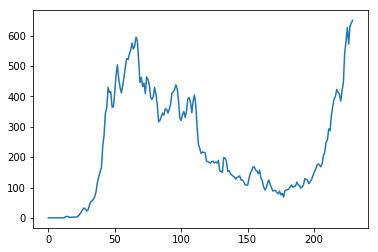

In [30]:
data['3d_SMA'].plot()

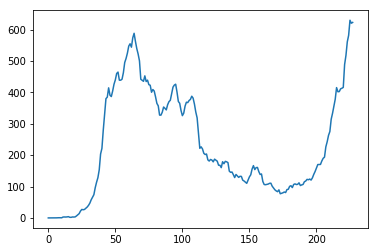

In [31]:
data['5d_SMA'].plot()

In [32]:
data.head()

,date,province,mean_retail_change,mean_grocery_change,mean_parks_change,mean_transit_change,mean_workplace_change,mean_residential_change,new,1d_lag,3d_SMA,5d_SMA,3d_SMA_14d_lag
0,2020-02-15,Ontario,6.466667,4.674419,24.333333,23.724138,1.767442,-1.000000,0.0,0.0,0.0,0.0,0.0
1,2020-02-16,Ontario,15.555556,15.452381,46.368421,6.678571,-1.595238,-2.291667,0.0,0.0,0.0,0.0,0.0
2,2020-02-17,Ontario,-25.545455,-43.250000,67.333333,-4.827586,-67.725490,14.454545,0.0,0.0,0.0,0.0,0.0
3,2020-02-18,Ontario,-2.822222,11.777778,-8.600000,0.310345,-1.125000,1.266667,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,Ontario,-0.466667,4.111111,-4.538462,0.758621,1.375000,0.533333,0.0,0.0,0.0,0.2,0.0


In [33]:
data.isnull().sum()

date                       0
province                   0
mean_retail_change         0
mean_grocery_change        0
mean_parks_change          0
mean_transit_change        0
mean_workplace_change      0
mean_residential_change    0
new                        2
1d_lag                     3
3d_SMA                     5
5d_SMA                     7
3d_SMA_14d_lag             3
dtype: int64

In [34]:
data.tail(7).isnull().sum()

date                       0
province                   0
mean_retail_change         0
mean_grocery_change        0
mean_parks_change          0
mean_transit_change        0
mean_workplace_change      0
mean_residential_change    0
new                        2
1d_lag                     3
3d_SMA                     5
5d_SMA                     7
3d_SMA_14d_lag             3
dtype: int64

In [35]:
data = data.dropna()

In [36]:
data.isnull().sum()

date                       0
province                   0
mean_retail_change         0
mean_grocery_change        0
mean_parks_change          0
mean_transit_change        0
mean_workplace_change      0
mean_residential_change    0
new                        0
1d_lag                     0
3d_SMA                     0
5d_SMA                     0
3d_SMA_14d_lag             0
dtype: int64

In [37]:
data = data.reset_index()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = data[['index', 'mean_retail_change', 'mean_grocery_change', 'mean_parks_change', \
         'mean_transit_change', 'mean_workplace_change', 'mean_residential_change']]
y_new = data['new']
y_3d_sma = data['3d_SMA']
y_5d_sma = data['5d_SMA']

# fit to new
model_new = LinearRegression()
model_new.fit(X,y_new)

# fit to 3d sma
model_3d = LinearRegression()
model_3d.fit(X,y_3d_sma)

# fit to 5d sma
model_5d = LinearRegression()
model_5d.fit(X,y_5d_sma)

LinearRegression()

In [40]:
print("model_new has R2:",model_new.score(X, y_new))
print("model_3d has R2:",model_3d.score(X, y_3d_sma))
print("model_5d has R2:",model_5d.score(X, y_5d_sma))

model_new has R2: 0.5867772108283704
model_3d has R2: 0.6236913891831168
model_5d has R2: 0.6418469704140596


In [41]:
from statsmodels.api import OLS
OLS(y_new,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    new   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              178.6
Date:                Wed, 11 Nov 2020   Prob (F-statistic):                    2.79e-87
Time:                        14:18:47   Log-Likelihood:                         -1392.6
No. Observations:                 228   AIC:                                      2799.
Df Residuals:                     221   BIC:                                      2823.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
index                       0.9308      0.255      3.647      0.000       0.428       1.434
mean_retail_change         -1.2280      1.691     -0.726      0.469      -4.561       2.105
mean_grocery_change        -1.0574      0.996     -1.061      0.290      -3.021       0.906
mean_parks_change           0.1002      0.211      0.475      0.635      -0.315       0.516
mean_transit_change        -2.9989      1.527     -1.964      0.051      -6.008       0.011
mean_workplace_change       9.7987      1.311      7.473      0.000       7.215      12.383
mean_residential_change    30.3296      4.100      7.398      0.000      22.250      38.409
==============================================================================
Omnibus:                        3.760   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.797
Skew:                           0.172   Prob(JB):                        0.150
Kurtosis:                       3.530   Cond. No.                         94.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# try splitting into train test
from sklearn.model_selection import train_test_split


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y_new, test_size=0.3, random_state=23)
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X, y_3d_sma, test_size=0.3, random_state=23)
X_train_5d, X_test_5d, y_train_5d, y_test_5d = train_test_split(X, y_5d_sma, test_size=0.3, random_state=23)

In [43]:
# check new performance
from sklearn.metrics import mean_squared_error
m1_new = LinearRegression()
m1_new.fit(X_train_new, y_train_new)
m1_new_pred = m1_new.predict(X_test_new)
m1_new_pred_train = m1_new.predict(X_train_new)

m1_3d = LinearRegression()
m1_3d.fit(X_train_3d, y_train_3d)
m1_3d_pred = m1_3d.predict(X_test_3d)
m1_3d_pred_train = m1_3d.predict(X_train_3d)

m1_5d = LinearRegression()
m1_5d.fit(X_train_5d, y_train_5d)
m1_5d_pred = m1_5d.predict(X_test_5d)
m1_5d_pred_train = m1_5d.predict(X_train_5d)

# we will use rmse to evaluate model performance
print('m1_new')
print('training rmse:', mean_squared_error(m1_new_pred_train, y_train_new, squared=False))
print('test rmse:', mean_squared_error(m1_new_pred, y_test_new)**0.5)

print('m1_3d')
print('training rmse:', mean_squared_error(m1_3d_pred_train, y_train_3d, squared=False))
print('test rmse:', mean_squared_error(m1_3d_pred, y_test_3d, squared=False))

print('m1_5d')
print('training rmse:', mean_squared_error(m1_5d_pred_train, y_train_5d, squared=False))
print('test rmse:', mean_squared_error(m1_5d_pred, y_test_5d, squared=False))






m1_new
training rmse: 106.8890914898478
test rmse: 113.450207074951
m1_3d
training rmse: 103.48217664109609
test rmse: 103.73874663881357
m1_5d
training rmse: 100.94234079688711
test rmse: 101.35697741781462


This means that our predictions are off by a margin of $\pm 100$ cases on average

In [44]:
results = pd.DataFrame({'new_pred':m1_new_pred, 'new_actual':y_test_new, \
                        '3d_pred':m1_3d_pred, '3d_actual':y_test_3d, \
                        '5d_pred':m1_5d_pred, '5d_actual':y_test_5d}).reset_index(drop=True)
results.head(20)

,new_pred,new_actual,3d_pred,3d_actual,5d_pred,5d_actual
0,343.100051,525.0,351.559285,409.000000,359.984569,434.4
1,203.822596,105.0,222.901124,102.000000,234.931259,115.2
2,237.341643,197.0,236.607651,185.000000,238.447646,181.2
3,267.141255,203.0,265.606751,215.000000,267.189643,202.0
4,393.813698,351.0,407.441721,362.333333,420.444777,384.8
5,363.141591,426.0,368.387666,412.666667,377.535812,391.0
6,337.538720,424.0,345.888948,443.666667,355.066826,452.6
7,381.923299,309.0,391.874467,470.666667,403.296795,460.2
8,193.431102,129.0,192.445929,109.666667,192.481403,110.2
9,368.669109,399.0,375.683952,372.333333,383.003409,357.2


### Check for auto-correlation in the response

In [45]:
import statsmodels.api as sm

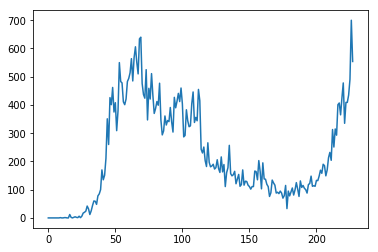

In [46]:
plt.plot(data['new'])

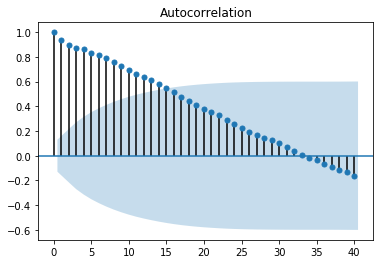

In [47]:
sm.graphics.tsa.plot_acf(data['new'], lags=40)
plt.show()

The correlation between 2 points diminishes as the time between the points increases

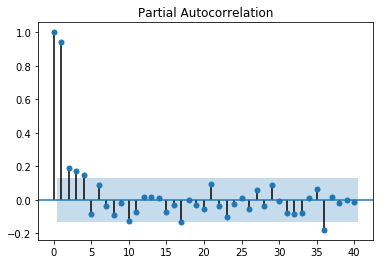

In [48]:
sm.graphics.tsa.plot_pacf(data['new'], lags=40)
plt.show()

After lag 4, the correlation is no longer statistically significant. This suggests that with the previous 4 day counts, we can predict the number of new cases on the 5th day. 

#### Hypotheses to Explore
Be careful not to use SMA data to predict one of the points in the SMA.

1. Try a bunch of different lags with a 3d SMA and see which day gives the best performance.
2. Try using mobility for day t with counts for day t, t+1, t+2, and t+3 to predict t+4.

1. lag of reporting per province
2. lag of environment to onset (mobility -> onset)
3. lag of onset to reporting

In [49]:
# try lag 0 to lag 20 (up to 3 weeks)
max_lag = 21

data2 = data.copy()

# 3d_SMA is lag 0
for i in range(1,max_lag):
    data2["lag_"+str(i)] = data['3d_SMA'].shift(-i)
    


In [50]:
data2 = data2.dropna()

In [51]:
np.random.seed(23)

In [52]:
X2 = data2[['index', 'mean_retail_change', 'mean_grocery_change', 
            'mean_parks_change', 'mean_transit_change',
            'mean_workplace_change', 'mean_residential_change']]

lag_results = list()

for i in range(1,max_lag):
    #print('predicting:',"lag_"+str(i))
    name = "lag_"+str(i)
    target = data2[name]
    temp_model = LinearRegression()
    temp_model.fit(X2, target)
    R2 = temp_model.score(X2, target)
    lag_results.append(R2)
    #print("R2", R2)

lag_res_df = pd.DataFrame({'lag':np.array(range(1,max_lag)), 'R2': lag_results})
lag_res_df


,lag,R2
0,1,0.724061
1,2,0.748467
2,3,0.775463
3,4,0.799781
4,5,0.817607
5,6,0.830104
6,7,0.836798
7,8,0.847311
8,9,0.852135
9,10,0.848698


Lag 7 to 11 are good, with lag 9 being the best predicted.

#### Improvements to hypothesis 2:
- we can add case counts for the 3-4 days leading up to the predicted lag time.
- this can get tricky with the smoothing (we do not want to overlap explanatory new cases and predicted new cases), so we can redo hypothesis 1 without using the 3 day smoothed new case count.
- alternatively, we could only attach new case counts for days -3 to -6

In [53]:

can2 = pd.read_csv('../Datasets/data_can2.csv')

In [54]:
can2.head()

,date,key_apple_mobility,key_google_mobility,id,tests,confirmed,recovered,deaths,hosp,vent,...,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,driving,walking,transit
0,2020-03-11,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,-1.0,0.0,NaN,NaN,0.0,1.0,112.23,NaN,NaN
1,2020-03-12,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,8.0,16.0,NaN,NaN,0.0,0.0,107.63,NaN,NaN
2,2020-03-13,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,-5.0,35.0,NaN,NaN,-3.0,3.0,108.80,NaN,NaN
3,2020-03-14,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,-17.0,11.0,NaN,NaN,-4.0,NaN,104.16,NaN,NaN
4,2020-03-15,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,1,NaN,0,NaN,NaN,...,NaN,-3.0,18.0,NaN,NaN,2.0,NaN,77.46,NaN,NaN


In [55]:
can2.shape

(2862, 49)

In [56]:
np.unique(can2['key_google_mobility'].values)

array(['CA, Alberta', 'CA, British Columbia', 'CA, Manitoba',
       'CA, New Brunswick', 'CA, Newfoundland and Labrador',
       'CA, Northwest Territories', 'CA, Nova Scotia', 'CA, Nunavut',
       'CA, Ontario', 'CA, Prince Edward Island', 'CA, Quebec',
       'CA, Saskatchewan', 'CA, Yukon'], dtype=object)

In [57]:
on2 = can2[can2['key_google_mobility'] == 'CA, Ontario']
bc = can2[can2['key_google_mobility'] == 'CA, British Columbia']

In [58]:
can2.columns

Index(['date', 'key_apple_mobility', 'key_google_mobility', 'id', 'tests',
       'confirmed', 'recovered', 'deaths', 'hosp', 'vent', 'icu', 'population',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_alpha_2', 'key_numeric', 'metro_area', 'iso_3166_2_code',
       'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_perce

In [59]:
on2.shape

(233, 49)

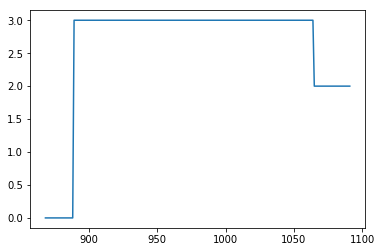

In [60]:
on2.school_closing.plot()

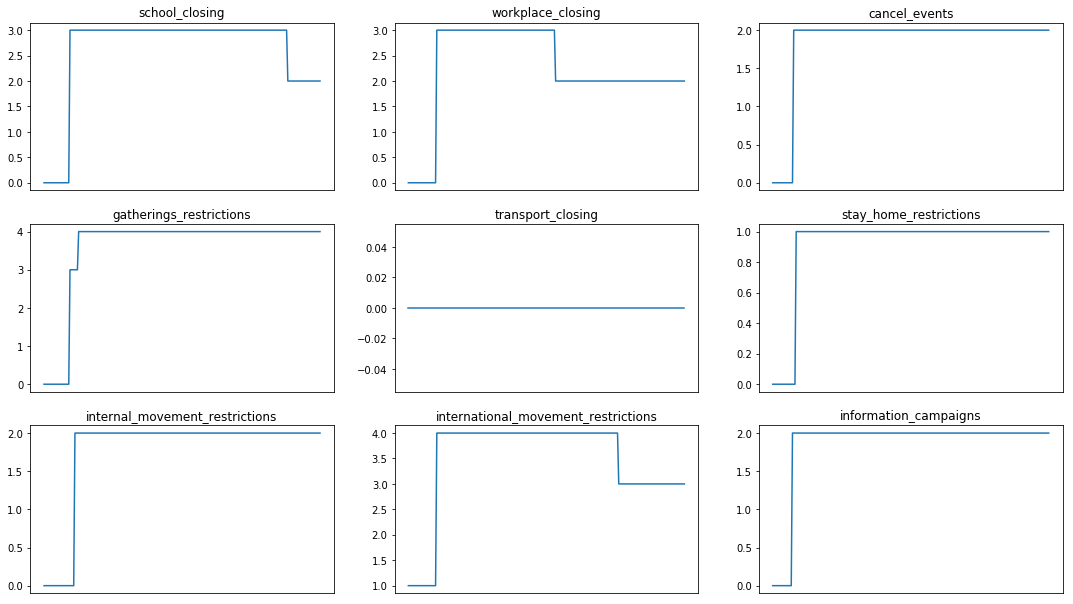

In [61]:
from matplotlib.pyplot import figure
lockdown_procs = ['school_closing', 'workplace_closing', 'cancel_events',
 'gatherings_restrictions', 'transport_closing',
 'stay_home_restrictions', 'internal_movement_restrictions',
 'international_movement_restrictions', 'information_campaigns']


#figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
x = on2['date']
for i, proc in enumerate(lockdown_procs):
    a = i//3
    b = i%3
    y = on2[proc]
    axs[a,b].plot(x.values,y.values)
    axs[a,b].set_title(proc)
    axs[a,b].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
plt.show()
    

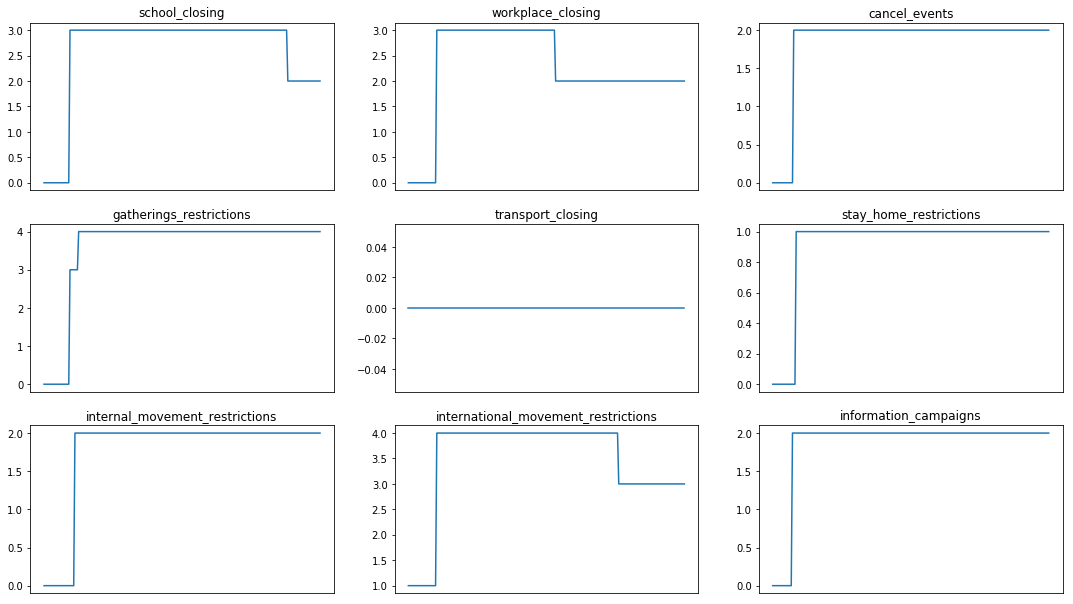

In [62]:
from matplotlib.pyplot import figure
lockdown_procs = ['school_closing', 'workplace_closing', 'cancel_events',
 'gatherings_restrictions', 'transport_closing',
 'stay_home_restrictions', 'internal_movement_restrictions',
 'international_movement_restrictions', 'information_campaigns']


#figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
x = bc['date']
for i, proc in enumerate(lockdown_procs):
    a = i//3
    b = i%3
    y = on2[proc]
    axs[a,b].plot(x.values,y.values)
    axs[a,b].set_title(proc)
    axs[a,b].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
plt.show()

In [63]:
# check for correlation between lockdown procedures and case count
temp = lockdown_procs+['new']

on2['new'] = on2['confirmed'].values - on2['confirmed'].shift(1).values  # new cases today


on2[temp].corr()

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,new
school_closing,1.000000,0.819194,0.830990,0.918324,NaN,0.882788,0.837906,0.893071,0.804239,0.283065
workplace_closing,0.819194,1.000000,0.717060,0.805183,NaN,0.761756,0.791130,0.894532,0.693976,0.588409
cancel_events,0.830990,0.717060,1.000000,0.881106,NaN,0.941325,0.808529,0.755774,0.967808,0.379328
gatherings_restrictions,0.918324,0.805183,0.881106,1.000000,NaN,0.936028,0.944209,0.854969,0.852741,0.453021
transport_closing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stay_home_restrictions,0.882788,0.761756,0.941325,0.936028,NaN,1.000000,0.858927,0.802884,0.911021,0.401297
internal_movement_restrictions,0.837906,0.791130,0.808529,0.944209,NaN,0.858927,1.000000,0.843218,0.782501,0.457702
international_movement_restrictions,0.893071,0.894532,0.755774,0.854969,NaN,0.802884,0.843218,1.000000,0.731444,0.406007
information_campaigns,0.804239,0.693976,0.967808,0.852741,NaN,0.911021,0.782501,0.731444,1.000000,0.366964
new,0.283065,0.588409,0.379328,0.453021,NaN,0.401297,0.457702,0.406007,0.366964,1.000000


Could try predicting new cases for the next week instead of the current week. The biggest issue here is the amount of data that we have.

These correlations between lockdown procedure and new case count have a positive correlation. This suggests that more lockdown procedures result in an increase in new cases; however, we would expect the opposite.

Let us try including these lockdown procedures into our model. The signal might not be that strong because we are only looking at the procedures in Ontario.

Rationale for positive correlation:
- should be compared between what happened and what would have happened
- these procedures are applied when the numbers are going up


In [64]:
on2.shape[0]

233

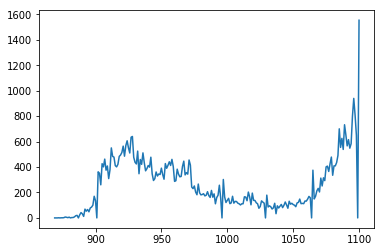

In [65]:
on2.new.plot()

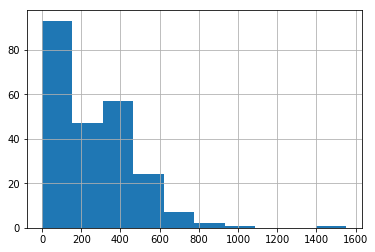

In [66]:
on2.new.hist()

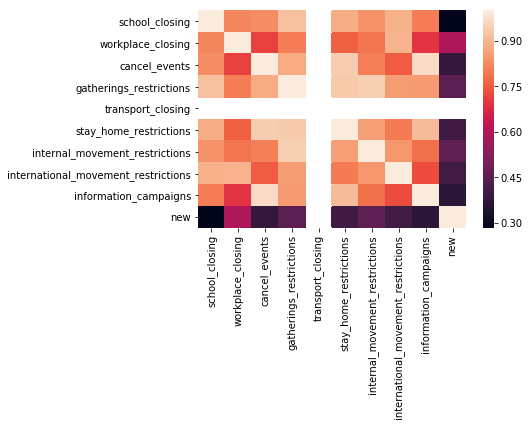

In [67]:
import seaborn as sns

sns.heatmap(on2[temp].corr())

Can use all except transport_closing (no changes)

We will use all the procedures as explanatory variables, except transport closing

In [68]:
# get dates to fill range of min(on2[date]) and max(on2[date]), merge dataset, and ffill na's for lockdown data
on2.head(10)

,date,key_apple_mobility,key_google_mobility,id,tests,confirmed,recovered,deaths,hosp,vent,...,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,driving,walking,transit,new
868,2020-01-31,Ontario,"CA, Ontario",83fc0fa9,NaN,3,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126.57,128.71,102.95,NaN
869,2020-02-08,Ontario,"CA, Ontario",83fc0fa9,NaN,3,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,113.55,120.61,89.23,0.0
870,2020-02-16,Ontario,"CA, Ontario",83fc0fa9,NaN,3,NaN,0,NaN,NaN,...,16.0,13.0,44.0,5.0,-2.0,-2.0,101.27,107.86,72.52,0.0
871,2020-02-21,Ontario,"CA, Ontario",83fc0fa9,NaN,3,NaN,0,NaN,NaN,...,1.0,-3.0,11.0,-1.0,-7.0,1.0,136.47,141.55,108.22,0.0
872,2020-02-24,Ontario,"CA, Ontario",83fc0fa9,NaN,4,NaN,0,NaN,NaN,...,2.0,2.0,18.0,-2.0,2.0,0.0,101.42,104.62,92.71,1.0
873,2020-02-25,Ontario,"CA, Ontario",83fc0fa9,NaN,4,NaN,0,NaN,NaN,...,1.0,7.0,2.0,1.0,3.0,0.0,105.84,103.71,93.98,0.0
874,2020-02-26,Ontario,"CA, Ontario",83fc0fa9,NaN,5,NaN,0,NaN,NaN,...,-8.0,-5.0,-15.0,-6.0,-2.0,3.0,96.75,90.03,88.68,1.0
875,2020-02-27,Ontario,"CA, Ontario",83fc0fa9,NaN,6,NaN,0,NaN,NaN,...,-13.0,-12.0,-17.0,-5.0,-8.0,5.0,101.12,91.16,90.22,1.0
876,2020-02-29,Ontario,"CA, Ontario",83fc0fa9,NaN,8,NaN,0,NaN,NaN,...,5.0,6.0,9.0,6.0,8.0,-1.0,121.00,127.34,93.33,2.0
877,2020-03-01,Ontario,"CA, Ontario",83fc0fa9,NaN,15,NaN,0,NaN,NaN,...,11.0,10.0,23.0,4.0,6.0,-1.0,93.15,93.66,76.25,7.0


In [69]:
# how to fill in missing data values? Just leave as NA?
# we do not need to fill in missing data if we take into account the gaps between dates
# this could be problematic if the missing date cases are represented in the next report of new cases
# but we can address that later.

base_date = on2.date.min()
print(base_date)
diff = datetime.date(datetime.strptime(on_mobil_mean.date.max(), "%Y-%m-%d")) - \
datetime.date(datetime.strptime("2020-01-31", "%Y-%m-%d"))
diff.days

day_num = [datetime.date(datetime.strptime(x, "%Y-%m-%d")) - datetime.date(datetime.strptime("2020-01-31", "%Y-%m-%d")) for x in on2.date.values]
day_num = [x.days for x in day_num]



2020-01-31


In [70]:
day_num[:10]

[0, 8, 16, 21, 24, 25, 26, 27, 29, 30]

In [71]:
# get missing days

first_date = min(on2.date.values)
last_date = max(on2.date.values)
in_btw_dates = pd.date_range(start=first_date, end=last_date).values

in_btw_dates = [str(d)[:10] for d in in_btw_dates]

dates_temp = set(on2.date.values)

missing_dates = [d for d in in_btw_dates if d not in dates_temp]


In [72]:
print(len(missing_dates))
print(missing_dates)

24
['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-22', '2020-02-23', '2020-02-28', '2020-03-02', '2020-03-04', '2020-03-10']


Reporting was not consistent before March 11.

In [73]:
print(on2.shape)
print(on2[on2.date > '2020-03-10'].shape)

(233, 50)
(217, 50)


In [74]:
233-217 # 16, but shouldn't this be 24?

16

In [75]:
data_hyp2 = on2[on2.date > '2020-03-10']

day_num = [datetime.date(datetime.strptime(x, "%Y-%m-%d")) - datetime.date(datetime.strptime("2020-03-10", "%Y-%m-%d")) for x in data_hyp2.date.values]
day_num = [x.days for x in day_num]




data_hyp2['day_num'] = day_num

# we will introduce a 7 day lag in factors -> new case count
# we will also do a 7 day lag on a 3-day moving average -> new case count

# 7 day lag
data_hyp2['new_lag7'] = data_hyp2['new'].shift(-7).values
data_hyp2['3d_SMA'] = data_hyp2['new'].rolling(window=3).mean()
data_hyp2['3d_SMA_lag7'] = data_hyp2['3d_SMA'].shift(-7).values


lockdown_procs_no_transport = ['school_closing', 'workplace_closing', 'cancel_events',
 'gatherings_restrictions',
 'stay_home_restrictions', 'internal_movement_restrictions',
 'international_movement_restrictions', 'information_campaigns']

mobility = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

hyp2_vars = lockdown_procs_no_transport+mobility+['day_num', 'constant']
data_hyp2 = data_hyp2[lockdown_procs_no_transport+mobility+['day_num', 'new_lag7', '3d_SMA_lag7']]
data_hyp2 = data_hyp2.dropna().reset_index(drop=True)
data_hyp2.insert(0,'constant',np.array(data_hyp2.shape[0]*[1.0]))
# print(data_hyp2.dtypes)
# data_hyp2 = pd.to_numeric(data_hyp2)
data_hyp2 = data_hyp2.astype(np.float64)

X_hyp2 = data_hyp2[hyp2_vars]
new7 =  data_hyp2['new_lag7']
sma_3d7 = data_hyp2['3d_SMA_lag7']

X_hyp2.shape


/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

(208, 16)

In [76]:
data_hyp2.columns

Index(['constant', 'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'day_num', 'new_lag7',
       '3d_SMA_lag7'],
      dtype='object')

In [77]:
# create OLS model with linear regression

import statsmodels.api as sm

new_set = ['school_closing', 
           'workplace_closing', 
           'cancel_events',
           'gatherings_restrictions',
           #'stay_home_restrictions', 
           #'internal_movement_restrictions',
           'international_movement_restrictions',
           #'information_campaigns',
           'retail_and_recreation_percent_change_from_baseline',
           'grocery_and_pharmacy_percent_change_from_baseline',
           #'parks_percent_change_from_baseline',
           'transit_stations_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline',
           #'residential_percent_change_from_baseline', 
           'day_num', 
           'constant']

X_hyp2 = X_hyp2[new_set]

model_hyp2 = sm.OLS(new7,X_hyp2)
res1 = model_hyp2.fit()
print(res1.summary())

model2_hyp2 = sm.OLS(sma_3d7,X_hyp2)
res2 = model2_hyp2.fit()
print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:               new_lag7   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     76.48
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           2.60e-62
Time:                        14:18:53   Log-Likelihood:                -1214.3
No. Observations:                 208   AIC:                             2451.
Df Residuals:                     197   BIC:                             2487.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

List of changes to full model:
1. remove parks_percent_change_from_baseline (0.94)
2. remove information_campaigns (0.79)
3. could remove intercept, but will leave it for now
4. remove internal_movement_restrictions (0.26)
5. remove stay_home_restrictions (0.179)
6. remove residential_percent_change_from_baseline (0.116)

### Check predictive performance...

### Using Nick's code

In [78]:
import pandas as pd
import numpy as np

# # Samuel's data set
# ont_data = pd.read_csv("data_can2.csv")

# # create new variables
# ont_data = ont_data.assign(
#     new_confirmed = ont_data["confirmed"].diff(),
#     new_tests = ont_data["tests"].diff(),
#     new_recovered = ont_data["recovered"].diff()
#     )

# # Ontario data
# ont_data = ont_data[ont_data["key_apple_mobility"] == "Ontario"]
# ont_data["date"] = pd.to_datetime(ont_data["date"])

# Ontario data on estimated positive case onset dates
pos_data = pd.read_csv("../Datasets/conposcovidloc.csv")
pos_data["Accurate_Episode_Date"] = pd.to_datetime(pos_data["Accurate_Episode_Date"])
pos_data["Test_Reported_Date"] = pd.to_datetime(pos_data["Test_Reported_Date"])

# Create lag variable
lag = pos_data["Test_Reported_Date"] - pos_data["Accurate_Episode_Date"]
pos_data['lag'] = lag.dt.days # timedelta object to integer for means
mean_lag = pos_data.groupby(by='Accurate_Episode_Date').mean()['lag']
mean_lag_dates = pd.Series(mean_lag.index.values)
mean_lag = pd.Series(mean_lag.values)
mean_lag_data = pd.concat([mean_lag_dates, mean_lag], axis = 1)
mean_lag_data.columns = ["date", "mean_lag"]

# estimated date of onset for confirmed positive cases
onset_date = pos_data["Accurate_Episode_Date"]  # symptom onset
cases = pd.Series(onset_date.value_counts().values)
date = pd.Series(onset_date.value_counts().index.values)
date = pd.to_datetime(date)
onset_data = pd.concat([date, cases], axis=1)
onset_data.columns = ['date', 'onset']

# merge the data frames
onset_data = onset_data.merge(mean_lag_data, on = "date")
onset_data["date"] = pd.to_datetime(onset_data["date"])

# The data frame below has the following new variables:
# onset: Number of confirmed positives whose symptoms started on that date.
# mean_lag: The mean number of days it took to report the confirmed cases whose
# onset of symptoms was the corresponding date.
# ont_data = ont_data.merge(onset_data, on = "date")

In [79]:
pos_data.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,lag
0,1,2020-10-01,2020-10-05,2020-10-05,2020-10-04,20s,FEMALE,CC,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893,4.0
1,2,2020-08-10,2020-08-13,2020-08-13,2020-08-10,40s,FEMALE,OB,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239,3.0
2,3,2020-10-07,2020-10-09,2020-10-09,2020-10-09,40s,FEMALE,CC,Not Resolved,NaN,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670,2.0
3,4,2020-10-06,2020-10-10,2020-10-10,2020-10-06,40s,FEMALE,Missing Information,Not Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239,4.0
4,5,2020-08-20,2020-08-24,2020-08-24,2020-08-24,80s,FEMALE,No known epi link,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893,4.0


Notes:
All these cases are positive

1. Accurate_Episode_Date - when symptoms started
2. Case_Reported_Date - when case was reported
3. Test_Reported_Date - when test results reported
4. Specimen_Date - earliest date of the case sent to lab (backlog)

Accurate_Episode_Date < Specimen_Date < Case_Reported_Date < Test_Reported_Date

In [80]:
onset_data.head()

,date,onset,mean_lag
0,2020-09-28,790,5.005135
1,2020-09-29,734,4.490305
2,2020-09-25,723,5.014045
3,2020-09-30,694,4.861314
4,2020-04-17,680,7.002959


In [81]:
onset_data.sort_values('date')

,date,onset,mean_lag
252,2019-12-25,1,95.000000
238,2020-01-01,3,177.666667
247,2020-01-10,1,152.000000
256,2020-01-16,1,266.000000
250,2020-01-21,1,6.000000
...,...,...,...
58,2020-10-12,395,1.658974
38,2020-10-13,457,1.441648
84,2020-10-14,322,1.165605
193,2020-10-15,104,0.587629


In [82]:
mean_lag = onset_data[['date', 'mean_lag']]

In [83]:
# data3 = on2[on2.date > '2020-03-10']

In [84]:
# dates = pd.to_datetime(data3.date.values)
# weekday_nums = [d.weekday() for d in dates]
# # monday is 0
# # sunday is 6
# is_weekday = [1 if d < 5 else 0 for d in weekday_nums]
# #month_nums = [d.month() for d in dates]

# # df['year'] = pd.DatetimeIndex(df['birth_date']).year

# #pd.DatetimeIndex(data3.date).dayofweek()
# months = pd.DatetimeIndex(data3.date).month
# # months

# winter = [12,1,2]
# spring = [3,4,5]
# summer = [6,7,8]
# fall = [9,10,11]

# is_winter = [1 if m in winter else 0 for m in months]
# is_spring = [1 if m in summer else 0 for m in months]
# is_fall = [1 if m in spring else 0 for m in months]
# is_summer = [1 if m in fall else 0 for m in months]


In [85]:
# add columns to the data
# data3['is_weekday'] = is_weekday
# data3['is_winter'] = is_winter
# data3['is_spring'] = is_fall
# data3['is_summer'] = is_spring
# data3['is_fall'] = is_summer


In [86]:
# data3['date'] = pd.to_datetime(data3['date'])

In [87]:
# data3 = data3.merge(mean_lag, how='left', on='date')

In [88]:
# # add response, day_num, and constant for regression
# data3['new_lag7'] = data3['new'].shift(-7).values
# data3['3d_SMA'] = data3['new'].rolling(window=3).mean()
# data3['3d_SMA_lag7'] = data3['3d_SMA'].shift(-7).values
# if 'constant' not in datfa3.columns:
#     data3.insert(0,'constant',np.array(data3.shape[0]*[1.0]))
# data3['day_num'] = day_num
# complete_data = data3.copy()

In [89]:
# data3.columns

In [144]:
# population data
pop_data = pd.read_csv('../Datasets/prov_population_data.csv')
# convert all numbers to integer data types
def fix_pop_data(data):
    columns = ['Q3 2019', 'Q4 2019', 'Q1 2020', 'Q2 2020', 'Q3 2020']
    for c in columns:
        data[c] = [int(d.replace(',','')) for d in data[c].values]
        
    # fix names and prep population
    data['Geography'] = ['CA, '+v for v in data['Geography'].values]
    data = data[['Geography', 'Q3 2020']]
    data.columns = ['province', 'population']
    return data

pop_data = fix_pop_data(pop_data)
pop_data

,province,population
0,"CA, Canada",38005238
1,"CA, Newfoundland and Labrador",522103
2,"CA, Prince Edward Island",159625
3,"CA, Nova Scotia",979351
4,"CA, New Brunswick",781476
5,"CA, Quebec",8574571
6,"CA, Ontario",14734014
7,"CA, Manitoba",1379263
8,"CA, Saskatchewan",1178681
9,"CA, Alberta",4421876


In [146]:
on2.columns

Index(['date', 'key_apple_mobility', 'key_google_mobility', 'id', 'tests',
       'confirmed', 'recovered', 'deaths', 'hosp', 'vent', 'icu', 'population',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_alpha_2', 'key_numeric', 'metro_area', 'iso_3166_2_code',
       'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_perce

In [195]:
set(on2.columns).difference(set(can2.columns))

{'new'}

In [197]:
can2.key_google_mobility.unique()

array(['CA, Prince Edward Island', 'CA, Manitoba', 'CA, Yukon',
       'CA, Nunavut', 'CA, Ontario', 'CA, Quebec', 'CA, Nova Scotia',
       'CA, British Columbia', 'CA, Newfoundland and Labrador',
       'CA, New Brunswick', 'CA, Saskatchewan', 'CA, Alberta',
       'CA, Northwest Territories'], dtype=object)

In [201]:
# loop over province names, compute new cases per day, create a running dataframe of results

def compute_new_prov(data):
    provinces = [
        'CA, Prince Edward Island', 'CA, Manitoba', 'CA, Yukon',
        'CA, Nunavut', 'CA, Ontario', 'CA, Quebec', 'CA, Nova Scotia',
        'CA, British Columbia', 'CA, Newfoundland and Labrador',
        'CA, New Brunswick', 'CA, Saskatchewan', 'CA, Alberta','CA, Northwest Territories'
    ]
    acc = pd.DataFrame({})
    
    for p in provinces:
        temp = data[data['key_google_mobility'] == p]
        temp['new'] = temp['confirmed'].shift(-1) - temp['confirmed']
        temp = temp[['date','key_google_mobility','new']].dropna()
        acc = pd.concat([acc,temp], axis=0)
    
    # merge dataframe to data
    data = data.merge(acc, how='left', on=['date', 'key_google_mobility'])
    return data

all_prov_data = compute_new_prov(can2)
    
    
    


/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [203]:
def build_complete_data(raw_data, lag_data=None, pop_data=None):
    complete_data = raw_data[raw_data.date > '2020-03-10']
    
    day_num = [datetime.date(datetime.strptime(x, "%Y-%m-%d")) - \
               datetime.date(datetime.strptime("2020-01-31", "%Y-%m-%d")) for x in complete_data.date.values]
    day_num = [x.days for x in day_num]
    
    dates = pd.to_datetime(complete_data.date.values)
    weekday_nums = [d.weekday() for d in dates]
    # monday is 0
    # sunday is 6
    is_weekday = [1 if d < 5 else 0 for d in weekday_nums]
    #month_nums = [d.month() for d in dates]

    # df['year'] = pd.DatetimeIndex(df['birth_date']).year

    #pd.DatetimeIndex(data3.date).dayofweek()
    months = pd.DatetimeIndex(complete_data.date).month
    # months

    winter = [12,1,2]
    spring = [3,4,5]
    summer = [6,7,8]
    fall = [9,10,11]

    is_winter = [1 if m in winter else 0 for m in months]
    is_spring = [1 if m in summer else 0 for m in months]
    is_fall = [1 if m in spring else 0 for m in months]
    is_summer = [1 if m in fall else 0 for m in months]
    
    complete_data['is_weekday'] = is_weekday
    complete_data['is_winter'] = is_winter
    complete_data['is_spring'] = is_fall
    complete_data['is_summer'] = is_spring
    complete_data['is_fall'] = is_summer
    
    complete_data['date'] = pd.to_datetime(complete_data['date'])
    if lag_data is not None:
        complete_data = complete_data.merge(lag_data, how='left', on='date')
    if pop_data is not None:
        complete_data = complete_data.merge(pop_data, how='left', left_on='key_google_mobility', right_on='province')
        # drop province column and change name of population_y to population
        complete_data = complete_data.rename({'population_y': 'population'}, axis='columns').drop('province', axis=1)
    
    # add response, day_num, and constant for regression
    complete_data['new_lag7'] = complete_data['new'].shift(-7).values
    complete_data['3d_SMA'] = complete_data['new'].rolling(window=3).mean()
    complete_data['3d_SMA_lag7'] = complete_data['3d_SMA'].shift(-7).values
    if 'constant' not in complete_data.columns:
        complete_data.insert(0,'constant',np.array(complete_data.shape[0]*[1.0]))
    complete_data['day_num'] = day_num
    return complete_data
    
complete_data = build_complete_data(on2, mean_lag, pop_data)
all_prov_data2 = build_complete_data(all_prov_data)

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [157]:
complete_data.head()


,constant,date,key_apple_mobility,key_google_mobility,id,tests,confirmed,recovered,deaths,hosp,...,is_winter,is_spring,is_summer,is_fall,mean_lag,population,new_lag7,3d_SMA,3d_SMA_lag7,day_num
0,1.00000,2020-03-11,Ontario,"CA, Ontario",83fc0fa9,3394.00000,42,nan,1,nan,...,0,1,0,0,14.56311,14734014,12.00000,nan,28.66667,40
1,1.00000,2020-03-12,Ontario,"CA, Ontario",83fc0fa9,4185.00000,59,nan,1,nan,...,0,1,0,0,14.39370,14734014,69.00000,nan,37.66667,41
2,1.00000,2020-03-13,Ontario,"CA, Ontario",83fc0fa9,4185.00000,79,nan,1,nan,...,0,1,0,0,18.26974,14734014,53.00000,15.00000,44.66667,42
3,1.00000,2020-03-14,Ontario,"CA, Ontario",83fc0fa9,6646.00000,79,nan,1,nan,...,0,1,0,0,14.15972,14734014,66.00000,12.33333,62.66667,43
4,1.00000,2020-03-15,Ontario,"CA, Ontario",83fc0fa9,8461.00000,103,nan,1,nan,...,0,1,0,0,14.73545,14734014,48.00000,14.66667,55.66667,44


In [204]:
all_prov_data2

,constant,date,key_apple_mobility,key_google_mobility,id,tests,confirmed,recovered,deaths,hosp,...,new,is_weekday,is_winter,is_spring,is_summer,is_fall,new_lag7,3d_SMA,3d_SMA_lag7,day_num
0,1.00000,2020-03-11,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,0.00000,1,0,1,0,0,1.00000,nan,0.33333,40
1,1.00000,2020-03-12,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,0.00000,1,0,1,0,0,0.00000,nan,0.33333,41
2,1.00000,2020-03-13,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,0.00000,1,0,1,0,0,0.00000,0.00000,0.33333,42
3,1.00000,2020-03-14,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,1.00000,0,0,1,0,0,1.00000,0.33333,0.33333,43
4,1.00000,2020-03-15,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,1,nan,0,nan,...,0.00000,0,0,1,0,0,0.00000,0.33333,0.33333,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,1.00000,2020-10-09,Northwest Territories,"CA, Northwest Territories",eef40c88,4786.00000,5,5.00000,0,nan,...,0.00000,1,0,0,0,1,nan,0.00000,nan,252
2858,1.00000,2020-10-10,Northwest Territories,"CA, Northwest Territories",eef40c88,4786.00000,5,5.00000,0,nan,...,0.00000,0,0,0,0,1,nan,0.00000,nan,253
2859,1.00000,2020-10-11,Northwest Territories,"CA, Northwest Territories",eef40c88,4786.00000,5,5.00000,0,nan,...,0.00000,0,0,0,0,1,nan,0.00000,nan,254
2860,1.00000,2020-10-12,Northwest Territories,"CA, Northwest Territories",eef40c88,4786.00000,5,5.00000,0,nan,...,0.00000,1,0,0,0,1,nan,0.00000,nan,255


In [159]:
complete_data.shape

(217, 62)

In [160]:
complete_data.columns

Index(['constant', 'date', 'key_apple_mobility', 'key_google_mobility', 'id',
       'tests', 'confirmed', 'recovered', 'deaths', 'hosp', 'vent', 'icu',
       'population_x', 'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_alpha_2', 'key_numeric', 'metro_area', 'iso_3166_2_code',
       'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_

In [230]:
def add_interactions(data, a_list, b_list):
    data_updated = data.copy()
    for a in a_list:
        for b in b_list:
            data_updated[a+"*"+b] = np.multiply(data[a].values, data[b].values)
    return data_updated

a_list = [    
    'school_closing', 
    'workplace_closing', 
    'cancel_events',
    'gatherings_restrictions',
    'stay_home_restrictions', 
    'internal_movement_restrictions',
    'international_movement_restrictions',
    'information_campaigns',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline', 
    'is_weekday', 
    'is_winter', 
    'is_spring', 
    'is_summer',
    'is_fall'
]
    
b_list = ['population']

all_prov_data_inter = add_interactions(all_prov_data2,a_list,b_list)

In [231]:
all_prov_data_inter.head()

,constant,date,key_apple_mobility,key_google_mobility,id,tests,confirmed,recovered,deaths,hosp,...,grocery_and_pharmacy_percent_change_from_baseline*population,parks_percent_change_from_baseline*population,transit_stations_percent_change_from_baseline*population,workplaces_percent_change_from_baseline*population,residential_percent_change_from_baseline*population,is_weekday*population,is_winter*population,is_spring*population,is_summer*population,is_fall*population
0,1.00000,2020-03-11,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,0.00000,nan,nan,0.00000,158158.00000,158158,0,158158,0,0
1,1.00000,2020-03-12,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,2530528.00000,nan,nan,0.00000,0.00000,158158,0,158158,0,0
2,1.00000,2020-03-13,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,5535530.00000,nan,nan,-474474.00000,474474.00000,158158,0,158158,0,0
3,1.00000,2020-03-14,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,0,nan,0,nan,...,1739738.00000,nan,nan,-632632.00000,nan,0,0,158158,0,0
4,1.00000,2020-03-15,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.00000,1,nan,0,nan,...,2846844.00000,nan,nan,316316.00000,nan,0,0,158158,0,0


In [246]:
all_prov_data_inter.columns

Index(['constant', 'date', 'key_apple_mobility', 'key_google_mobility', 'id',
       'tests', 'confirmed', 'recovered', 'deaths', 'hosp', 'vent', 'icu',
       'population', 'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_alpha_2', 'key_numeric', 'metro_area', 'iso_3166_2_code',
       'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_st

In [251]:
new_set = [
    'date', 'key_apple_mobility', 'key_google_mobility',
    'school_closing', 
    'workplace_closing', 
    'cancel_events',
    'gatherings_restrictions',
    'stay_home_restrictions', 
    'internal_movement_restrictions',
    'international_movement_restrictions',
    'information_campaigns',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline', 
    #'day_num', 
    'constant',
    #'mean_lag',
    'is_weekday', 
    'is_winter', 
    'is_spring', 
    'is_summer',
    'is_fall',
    'population',
    'school_closing*population', 'workplace_closing*population',
       'cancel_events*population', 'gatherings_restrictions*population',
       'stay_home_restrictions*population',
       'internal_movement_restrictions*population',
       'international_movement_restrictions*population',
       'information_campaigns*population',
       'retail_and_recreation_percent_change_from_baseline*population',
       'grocery_and_pharmacy_percent_change_from_baseline*population',
       'parks_percent_change_from_baseline*population',
       'transit_stations_percent_change_from_baseline*population',
       'workplaces_percent_change_from_baseline*population',
       'residential_percent_change_from_baseline*population',
       'is_weekday*population', 'is_winter*population', 'is_spring*population',
       'is_summer*population', 'is_fall*population'
    #'new'
]

expl_set = [
    #'date', 'key_apple_mobility', 'key_google_mobility',
    'school_closing', 
    'workplace_closing', 
    'cancel_events',
    'gatherings_restrictions',
    'stay_home_restrictions', 
    'internal_movement_restrictions',
    'international_movement_restrictions',
    'information_campaigns',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline', 
    #'day_num', 
    'constant',
    #'mean_lag',
    'is_weekday', 
    'is_winter', 
    'is_spring', 
    'is_summer',
    'is_fall',
    'population',
    'school_closing*population', 'workplace_closing*population',
       'cancel_events*population', 'gatherings_restrictions*population',
       'stay_home_restrictions*population',
       'internal_movement_restrictions*population',
       'international_movement_restrictions*population',
       'information_campaigns*population',
       'retail_and_recreation_percent_change_from_baseline*population',
       'grocery_and_pharmacy_percent_change_from_baseline*population',
       'parks_percent_change_from_baseline*population',
       'transit_stations_percent_change_from_baseline*population',
       'workplaces_percent_change_from_baseline*population',
       'residential_percent_change_from_baseline*population',
       'is_weekday*population', 'is_winter*population', 'is_spring*population',
       'is_summer*population', 'is_fall*population'
    #'new'
]

new_set2 = ['school_closing', 
           'workplace_closing', 
           'cancel_events',
           'gatherings_restrictions',
           #'stay_home_restrictions', 
           #'internal_movement_restrictions',
           'international_movement_restrictions',
           #'information_campaigns',
           'retail_and_recreation_percent_change_from_baseline',
           'grocery_and_pharmacy_percent_change_from_baseline',
           #'parks_percent_change_from_baseline',
           'transit_stations_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline',
           #'residential_percent_change_from_baseline', 
           #'day_num', 
           'constant',
           'mean_lag',
           'new',
           'new_lag7', '3d_SMA', '3d_SMA_lag7']

In [248]:



#data3 = data3[new_set2]

# data3 = data3.dropna().reset_index(drop=True)


# X3 = data3[new_set[:-1]]
# new7 =  data3['new_lag7']
# sma_3d7 = data3['3d_SMA_lag7']


def get_model_data(data, variables, resp1, resp2):
    data = data[variables+[resp1,resp2]]
    data = data.dropna().reset_index(drop=True)
    X_mat = data[variables]
    resp1 = data[resp1]
    resp2 = data[resp2]
    return X_mat, resp1, resp2

# X3, new7, sma_3d7 = get_model_data(complete_data, new_set, 'new_lag7', '3d_SMA_lag7')
X3, new7, sma_3d7 = get_model_data(all_prov_data_inter, new_set, 'new_lag7', '3d_SMA_lag7')


In [249]:
new7

0        9.00000
1        0.00000
2       -6.00000
3        0.00000
4        0.00000
          ...   
1644   364.00000
1645   277.00000
1646     0.00000
1647     0.00000
1648     0.00000
Name: new_lag7, Length: 1649, dtype: float64

In [252]:
model3 = sm.OLS(new7,X3[expl_set])
res3 = model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:               new_lag7   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     36.58
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          9.54e-170
Time:                        15:37:49   Log-Likelihood:                -10990.
No. Observations:                1649   AIC:                         2.205e+04
Df Residuals:                    1615   BIC:                         2.223e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [253]:
model4 = sm.OLS(sma_3d7,X3[expl_set])
res4 = model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:            3d_SMA_lag7   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     80.13
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          1.28e-311
Time:                        15:38:00   Log-Likelihood:                -10339.
No. Observations:                1649   AIC:                         2.075e+04
Df Residuals:                    1615   BIC:                         2.093e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [210]:
# investigate a lag of 2 weeks
# mean_lag effect

### Ontario linear model performance

To-do:
- train/test split over data
- check performance
- see residual plot 
- see qq-plot

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

on_pop = 14.73e6  # from Google
on_pop = 14.73 # million

n = X3.shape[0]
index_list = list(range(n))

train_ind, test_ind = train_test_split(index_list, train_size=0.8, random_state=23)

X3_train = X3[X3.index.isin(train_ind)]
X3_test = X3[X3.index.isin(test_ind)]

y7_train = new7[new7.index.isin(train_ind)] #/on_pop
y7_test = new7[new7.index.isin(test_ind)] #/on_pop

y3d7_train = sma_3d7[sma_3d7.index.isin(train_ind)] #/on_pop
y3d7_test = sma_3d7[sma_3d7.index.isin(test_ind)] #/on_pop

model_7 = sm.OLS(y7_train,X3_train[expl_set])
res_7 = model_7.fit()
pred_7 = res_7.predict(X3_test[expl_set])

model_3d7 = sm.OLS(y3d7_train,X3_train[expl_set])
res_3d7 = model_3d7.fit()
pred_3d7 = res_3d7.predict(X3_test[expl_set])

rmse_7 = mean_squared_error(y7_test, pred_7, squared=False)
rmse_3d7 = mean_squared_error(y3d7_test, pred_3d7, squared=False)

print(rmse_7)
print(rmse_3d7)

# rmse model 7, no pop = 92.24367110221012
# rmse model 3d7, no pop = 80.47753850060822

114.38873965195306
105.55382661273134


In [256]:
X3_train.columns

Index(['date', 'key_apple_mobility', 'key_google_mobility', 'school_closing',
       'workplace_closing', 'cancel_events', 'gatherings_restrictions',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'constant', 'is_weekday',
       'is_winter', 'is_spring', 'is_summer', 'is_fall', 'population',
       'school_closing*population', 'workplace_closing*population',
       'cancel_events*population', 'gatherings_restrictions*population',
       'stay_home_restrictions*population',
       'internal_movement_restrictions*population',
       'international_movement_restrictions*population'

In [213]:
# poisson regression => predict log response and then exponentiate

y7_train_log = np.log(y7_train+1)
y7_test_log = np.log(y7_test+1)

y3d7_train_log = np.log(y3d7_train+1)
y3d7_test_log = np.log(y3d7_test+1)

model_7_log = sm.OLS(y7_train_log,X3_train)
res_7_log = model_7_log.fit()
pred_7_log = res_7_log.predict(X3_test)

model_3d7_log = sm.OLS(y3d7_train_log,X3_train)
res_3d7_log = model_3d7_log.fit()
pred_3d7_log = res_3d7_log.predict(X3_test)

rmse_7_log = mean_squared_error(y7_test, np.exp(pred_7_log), squared=False)
rmse_3d7_log = mean_squared_error(y3d7_test, np.exp(pred_3d7_log), squared=False)

print(rmse_7_log)
print(rmse_3d7_log)


/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Notes
- log does not improve predictions

In [214]:
print(pred_7_log[:10])
print(pred_3d7_log[:10])

2    nan
17   nan
18   nan
19   nan
25   nan
27   nan
28   nan
34   nan
38   nan
46   nan
dtype: float64
2    nan
17   nan
18   nan
19   nan
25   nan
27   nan
28   nan
34   nan
38   nan
46   nan
dtype: float64


In [215]:
res_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               new_lag7   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     31.89
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           3.97e-86
Time:                        15:22:29   Log-Likelihood:                -8985.3
No. Observations:                1319   AIC:                         1.801e+04
Df Residuals:                    1301   BIC:                         1.810e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
school_closing                                       -30.1636     36.779     -0.820      0.412    -102.317      41.990
workplace_closing                                    -44.4507     22.136     -2.008      0.045     -87.876      -1.025
cancel_events                                         44.4453     51.495      0.863      0.388     -56.577     145.467
gatherings_restrictions                               60.7993     37.011      1.643      0.101     -11.809     133.407
stay_home_restrictions                               -77.0783     89.249     -0.864      0.388    -252.165      98.009
internal_movement_restrictions                       -28.1411     33.370     -0.843      0.399     -93.605      37.323
international_movement_restrictions                   11.4355     24.102      0.474      0.635     -35.848      58.719
information_campaigns                                -22.9525     35.366     -0.649      0.516     -92.333      46.428
retail_and_recreation_percent_change_from_baseline     3.3279      1.333      2.496      0.013       0.712       5.944
grocery_and_pharmacy_percent_change_from_baseline     -4.3047      0.928     -4.637      0.000      -6.126      -2.483
parks_percent_change_from_baseline                     0.2156      0.144      1.495      0.135      -0.067       0.499
transit_stations_percent_change_from_baseline         -1.9269      0.920     -2.095      0.036      -3.731      -0.123
workplaces_percent_change_from_baseline                3.5585      1.132      3.143      0.002       1.337       5.780
residential_percent_change_from_baseline              14.0797      3.745      3.759      0.000       6.732      21.427
constant                                             -11.4762     17.683     -0.649      0.516     -46.167      23.214
is_weekday                                           -56.7164     35.301     -1.607      0.108    -125.969      12.536
is_winter                                          -1.871e-15   2.66e-15     -0.704      0.481   -7.08e-15    3.34e-15
is_spring                                             21.1722     19.286      1.098      0.273     -16.664      59.008
is_summer                                            -72.6107     18.282     -3.972      0.000    -108.476     -36.745
is_fall                                               39.9623     28.016      1.426      0.154     -14.998      94.923
population                                          2.294e-05   1.65e-06     13.876      0.000    1.97e-05    2.62e-05
==============================================================================
Omnibus:                      728.287   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          10

Text(0.5,1,'residual vs index')

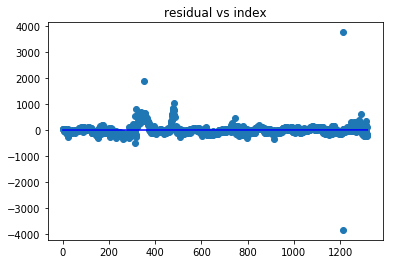

In [216]:
# check residual plot



# train set residuals
scat_x = list(range(len(y7_train)))
scat_y = y7_train-res_7.predict(X3_train)
plt.scatter(scat_x, scat_y)

slope, intercept = np.polyfit(scat_x, scat_y, 1)
abline_values = [slope * i + intercept for i in scat_x]

plt.plot(scat_x, abline_values, 'b')
plt.title('residual vs index')

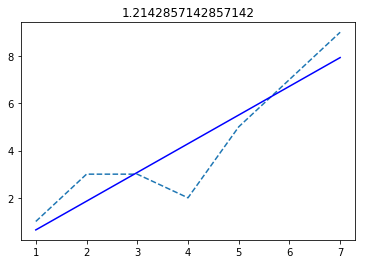

In [217]:
# Some dummy data
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 3, 2, 5, 7, 9]

# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y, '--')
plt.plot(x, abline_values, 'b')
plt.title(slope)
plt.show()

Text(0,0.5,'residual')

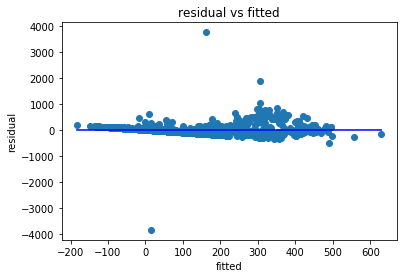

In [218]:
pairs = list(zip(res_7.predict(X3_train), y7_train-res_7.predict(X3_train)))
pairs.sort(key=lambda t: t[0])
scat_x, scat_y = zip(*pairs)

slope, intercept = np.polyfit(scat_x, scat_y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in scat_x]

plt.scatter(scat_x, scat_y)
plt.plot(scat_x, abline_values, 'b')
plt.title('residual vs fitted')
plt.xlabel('fitted')
plt.ylabel('residual')


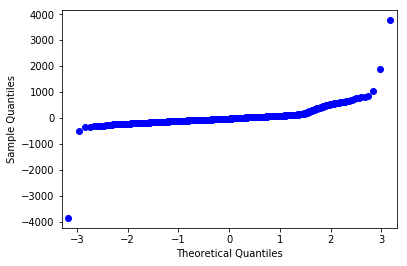

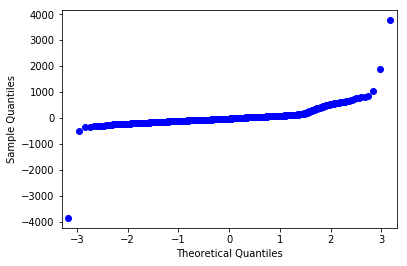

In [219]:
from sklearn.preprocessing import normalize
sm.qqplot(np.array(scat_y))

In [220]:
# create a prediction plot where you can vary the input of the model

# plot predicted vs actual curve

# investigate mean_lag vs time variable - why is time predictive?
# why is mean lag not very predictive? 
# because it helps predict relative to other variables

# # create a prediction interval
# dt = lm_fit.get_prediction(x_mat).summary_frame(alpha = 0.05)
# y_prd = dt['mean']
# yprd_ci_lower = dt['obs_ci_lower']
# yprd_ci_upper = dt['obs_ci_upper']
# print(pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper])).head())

In [221]:
new7.mean()

109.97574287446938

In [222]:
pred_int7 = res_7.get_prediction(X3_test).summary_frame(alpha=0.05)
pred_int7.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2,-79.63133,65.64323,-208.40951,49.14684,-532.72363,373.46096
17,78.90415,18.77314,42.07521,115.73309,-357.06051,514.86880
18,76.08468,18.72466,39.35085,112.81851,-359.87195,512.04131
19,81.37844,12.25001,57.34649,105.41038,-353.69207,516.44894
25,98.83505,20.76376,58.10093,139.56917,-337.47686,535.14695


In [257]:
# remove time component
expl = [
    'school_closing', 'workplace_closing', 
    #'cancel_events',
       'gatherings_restrictions', 'international_movement_restrictions',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 
    #'day_num', 
    'constant',
    'mean_lag'
]

X4_train = X3_train[expl_set] #[expl]
X4_test = X3_test[expl_set] #[expl]

mt = sm.OLS(y7_train, X4_train)
mt_fit = mt.fit()
mt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               new_lag7   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     24.89
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          4.63e-114
Time:                        15:39:29   Log-Likelihood:                -8889.1
No. Observations:                1319   AIC:                         1.785e+04
Df Residuals:                    1285   BIC:                         1.802e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
school_closing                                                  114.8422     58.533      1.962      0.050       0.012     229.672
workplace_closing                                               -48.1934     29.368     -1.641      0.101    -105.808       9.421
cancel_events                                                     1.8031     65.848      0.027      0.978    -127.378     130.985
gatherings_restrictions                                         -59.7172     54.653     -1.093      0.275    -166.935      47.501
stay_home_restrictions                                          -88.9420    111.809     -0.795      0.426    -308.290     130.406
internal_movement_restrictions                                   14.8470     45.567      0.326      0.745     -74.546     104.240
international_movement_restrictions                             -10.8675     35.501     -0.306      0.760     -80.515      58.780
information_campaigns                                            63.2069     46.675      1.354      0.176     -28.360     154.774
retail_and_recreation_percent_change_from_baseline                1.6628      1.795      0.927      0.354      -1.858       5.183
grocery_and_pharmacy_percent_change_from_baseline                -1.5557      1.265     -1.230      0.219      -4.037       0.925
parks_percent_change_from_baseline                                0.1154      0.180      0.641      0.522      -0.238       0.469
transit_stations_percent_change_from_baseline                     0.2000      1.116      0.179      0.858      -1.989       2.389
workplaces_percent_change_from_baseline                          -0.0262      1.497     -0.017      0.986      -2.963       2.910
residential_percent_change_from_baseline                          7.7374      4.892      1.582      0.114      -1.859      17.334
constant                                                         31.6034     23.337      1.354      0.176     -14.180      77.387
is_weekday                                                      -98.2926     47.043     -2.089      0.037    -190.582      -6.004
is_winter                                                     -3.071e-08   1.16e-07     -0.265      0.791   -2.58e-07    1.97e-07
is_spring                                                       -34.4000     26.668     -1.290      0.197     -86.718      17.918
is_summer                                                        -9.7194     26.586     -0.366      0.715     -61.877      42.438
is_fall                                                          75.7229     44.125      1.716      0.086     -10.843     162.289
population                                                    -8.016e-06   4.17e-06     -1.92

In [224]:
mt_pred = mt_fit.predict(X4_test)
mean_squared_error(mt_pred, y7_test, squared=False)

141.80072147337899

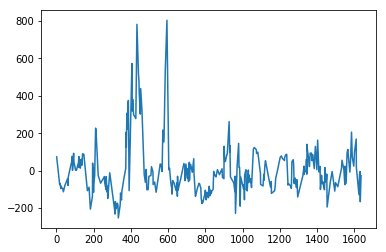

In [225]:
mt_pred = mt_fit.predict(X4_test)
plt.plot(y7_test-mt_pred)

In [226]:
# train on first 80%
# test on next 20%
X4 = X3[expl]
ind_train4 = list(range(int(np.floor(0.8*X4.shape[0]))))
ind_test4 = list(range(int(np.floor(0.8*X4.shape[0])), X3.shape[0]))

X4_train = X4.iloc[ind_train4, :]
X4_test = X4.iloc[ind_test4, :]
y4_train = new7.iloc[ind_train4]
y4_test = new7.iloc[ind_test4]

# model with first 80% of data
m4 = sm.OLS(y4_train, X4_train)
m4_fit = m4.fit()
m4_fit.summary()



KeyError: "['mean_lag'] not in index"

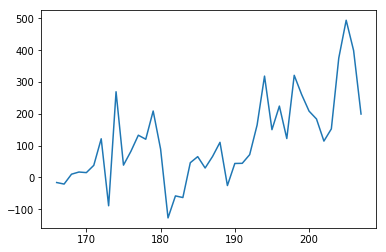

In [183]:
m4_pred = m4_fit.predict(X4_test)
plt.plot(y4_test-m4_pred)

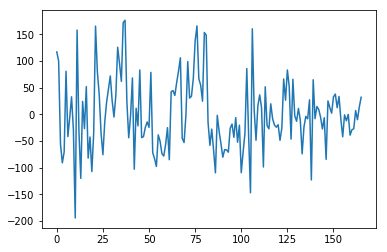

In [184]:
m4_pred_train = m4_fit.predict(X4_train)
plt.plot(y4_train-m4_pred_train)

# create autoregressive model for residuals

Coefficients: intercept   -2.44820
y.L1         0.26058
y.L2        -0.03286
y.L3         0.16989
y.L4         0.07592
y.L5         0.09908
y.L6        -0.14022
y.L7         0.08516
y.L8        -0.09899
y.L9        -0.01414
y.L10        0.07622
y.L11       -0.07647
y.L12       -0.05067
y.L13       -0.03753
y.L14       -0.03593
y.L15        0.02672
y.L16        0.09956
y.L17       -0.05081
y.L18       -0.18372
y.L19        0.08926
y.L20       -0.18457
y.L21       -0.08965
y.L22        0.17238
y.L23       -0.10858
y.L24       -0.15343
y.L25        0.06752
y.L26        0.07029
y.L27       -0.08239
y.L28        0.18172
y.L29       -0.12750
y.L30        0.16772
y.L31        0.01418
y.L32       -0.17608
y.L33        0.08335
y.L34       -0.08397
y.L35        0.01392
y.L36        0.02728
y.L37       -0.02265
y.L38       -0.12323
y.L39        0.13644
y.L40       -0.01515
y.L41       -0.08470
y.L42        0.09577
y.L43        0.02173
y.L44        0.17104
y.L45       -0.11677
y.L46        0.08670

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


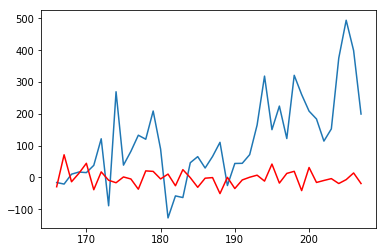

In [185]:
# investigating lag
from statsmodels.tsa.ar_model import AutoReg
errs = y4_train-m4_pred_train
errs_test = y4_test-m4_pred
model = AutoReg(errs, lags=50)

model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(errs), end=len(errs)+len(errs_test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = np.sqrt(mean_squared_error(errs_test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(errs_test)
plt.plot(predictions, color='red')
plt.show()

#### Does using the autoregressive model of errors help predictions?

In [186]:
pred4_adj = m4_pred + predictions
print('old:',mean_squared_error(y4_test, m4_pred, squared=False))
print('new:',mean_squared_error(y4_test, pred4_adj, squared=False))


old: 178.01600919059698
new: 182.95960058309205


#### Performance is worse!

### Poisson Regression

In [240]:
X3_train.columns

Index(['school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'constant', 'is_weekday',
       'is_winter', 'is_spring', 'is_summer', 'is_fall', 'population',
       'school_closing*population', 'workplace_closing*population',
       'cancel_events*population', 'gatherings_restrictions*population',
       'stay_home_restrictions*population',
       'internal_movement_restrictions*population',
       'international_movement_restrictions*population',
       'information_campaigns*population',
       '

In [258]:
poi_expl = ['school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 
        #'day_num', 
    'constant',
       'mean_lag', 'is_weekday', 'is_winter', 'is_spring', 'is_summer',
       'is_fall', 'population']


pd.set_option('display.float_format', lambda x: '%.5f' % x)
# try poisson regression
Xpoi_train = X3_train[expl_set] #[poi_expl]
Xpoi_test = X3_test[expl_set] #[poi_expl]
ypoi_train = y7_train
ypoi_test = y7_test

poisson_training_results = sm.GLM(ypoi_train, Xpoi_train, family=sm.families.Poisson()).fit()

In [259]:
poisson_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               new_lag7   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1285
Model Family:                 Poisson   Df Model:                           33
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 11 Nov 2020   Deviance:                   4.4318e+05
Time:                        15:39:52   Pearson chi2:                 1.50e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
school_closing                                                    0.9308      0.031     29.911      0.000       0.870       0.992
workplace_closing                                                -5.4013      0.103    -52.347      0.000      -5.604      -5.199
cancel_events                                                    -0.8396      0.074    -11.410      0.000      -0.984      -0.695
gatherings_restrictions                                          -0.3723      0.036    -10.463      0.000      -0.442      -0.303
stay_home_restrictions                                           -1.9820      0.127    -15.603      0.000      -2.231      -1.733
internal_movement_restrictions                                    6.7450      0.160     42.122      0.000       6.431       7.059
international_movement_restrictions                              -0.4386      0.033    -13.170      0.000      -0.504      -0.373
information_campaigns                                             0.9682      0.050     19.315      0.000       0.870       1.066
retail_and_recreation_percent_change_from_baseline               -0.0286      0.001    -19.411      0.000      -0.031      -0.026
grocery_and_pharmacy_percent_change_from_baseline                 0.0181      0.001     21.230      0.000       0.016       0.020
parks_percent_change_from_baseline                                0.0087      0.000     59.245      0.000       0.008       0.009
transit_stations_percent_change_from_baseline                    -0.0900      0.001    -75.391      0.000      -0.092      -0.088
workplaces_percent_change_from_baseline                           0.0583      0.001     53.913      0.000       0.056       0.060
residential_percent_change_from_baseline                          0.2017      0.003     64.056      0.000       0.196       0.208
constant                                                          0.4841      0.025     19.315      0.000       0.435       0.533
is_weekday                                                       -1.6927      0.032    -52.210      0.000      -1.756      -1.629
is_winter                                                     -1.085e-08   2.34e-10    -46.396      0.000   -1.13e-08   -1.04e-08
is_spring                                                         2.0806      0.066     31.671      0.000       1.952       2.209
is_summer                                                        -1.6629      0.042    -39.594      0.000      -1.745      -1.581
is_fall                                                           0.0664      0.047      1.419      0.156      -0.025       0.158
population                                                     3.147e-09   2.45e-09      1.28

In [260]:
poisson_training_results.pvalues

school_closing                                                  0.00000
workplace_closing                                               0.00000
cancel_events                                                   0.00000
gatherings_restrictions                                         0.00000
stay_home_restrictions                                          0.00000
internal_movement_restrictions                                  0.00000
international_movement_restrictions                             0.00000
information_campaigns                                           0.00000
retail_and_recreation_percent_change_from_baseline              0.00000
grocery_and_pharmacy_percent_change_from_baseline               0.00000
parks_percent_change_from_baseline                              0.00000
transit_stations_percent_change_from_baseline                   0.00000
workplaces_percent_change_from_baseline                         0.00000
residential_percent_change_from_baseline                        

In [261]:
poi_pred = poisson_training_results.predict(Xpoi_test[expl_set])
poi_rmse = mean_squared_error(poi_pred, ypoi_test, squared=False)
print('Poisson Regression rmse:',poi_rmse)

Poisson Regression rmse: 128.7535449173628


In [ ]:
# check prediction by province

# temp = Xpoi_test[['date', '']]


In [262]:
Xpoi_test.columns

Index(['school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'constant', 'is_weekday',
       'is_winter', 'is_spring', 'is_summer', 'is_fall', 'population',
       'school_closing*population', 'workplace_closing*population',
       'cancel_events*population', 'gatherings_restrictions*population',
       'stay_home_restrictions*population',
       'internal_movement_restrictions*population',
       'international_movement_restrictions*population',
       'information_campaigns*population',
       '

### $t^3$ trend removal regression

In [127]:
t_train = X3_train.day_num.values
count_train = y7_train 

poly_model = np.polyfit(t_train, count_train, deg=3)
poly_model

AttributeError: 'DataFrame' object has no attribute 'day_num'

In [ ]:
plt.plot(t_train, count_train)


In [ ]:
p = np.poly1d(poly_model)
resp = p([i for i in range(230)])
plt.plot([i for i in range(230)], resp)

In [ ]:
plt.figure(1)
plt.plot([i for i in range(230)], resp)
plt.plot(t_train, count_train)
plt.legend()

### Assume the $t^3$ curve is our best fit
- We want to get the errors and predict the errors using our data

In [ ]:
t_errs = [np.array(count_train)[i] - resp[k] for i,k in enumerate(t_train)]

In [ ]:
plt.hist(t_errs)

In [ ]:
plt.plot(t_train,t_errs)
plt.title('errs vs day number')

### Linear model on residuals

In [ ]:
t_err_lr = sm.OLS(t_errs, Xpoi_train)
t_err_lr_fit = t_err_lr.fit()
t_err_lr_fit.summary()

### Poisson model on residuals

In [ ]:
#poisson_errs = sm.GLM(t_errs, Xpoi_train, family=sm.families.Poisson()).fit()
# poisson_errs.summary()


Cannot do Poisson regression on negative residuals!

### HW for Nov 15
- add variable for population so that you can train on multiple provinces
- add potential interactions for variables
- train models and see if predictability is still good

In [ ]:
pop_data

## US Data

In [ ]:
usa = pd.read_csv('../Datasets/data_usa2.csv')

In [ ]:
usa.head()

In [ ]:
# use the top 4 to compare closings
states1 = usa.key_google_mobility.unique()[:4]
states1

In [ ]:
usa.columns

In [ ]:
lockdown_procs = ['school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions','international_movement_restrictions']

In [ ]:
temp = usa[usa.key_google_mobility.isin(states1)][lockdown_procs+['date']].dropna()
for i, p in enumerate(lockdown_procs):
    temp[['date']+[p]].plot()

In [ ]:
# USA is also country wide

In [ ]:
# weekly mobility data
